# Classification with different Machine learning algorithms (Traditional)

# importing libraries

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns


# importing data from pickle

In [2]:
pickle_in = open("data1.pickle","rb")
data=pickle.load(pickle_in)
pickle_in.close()

# Feature and label

In [3]:
#featureset labvel;

random.shuffle(data)
features =[]
labels = []

for feature, label in data:
    features.append(feature)
    labels.append(label)

# Train and test data split 

In [4]:
#train test

xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size =0.25)

# Machine learning Algorithms

## Random Forest Classifier

In [5]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 40)
classifier.fit(xtrain, ytrain)


RandomForestClassifier(n_estimators=40)

In [6]:
from sklearn.metrics import classification_report
predictions = classifier.predict(xtest)
print (classification_report(ytest, predictions))

              precision    recall  f1-score   support

           0       0.50      0.75      0.60         4
           1       0.50      0.25      0.33         4

    accuracy                           0.50         8
   macro avg       0.50      0.50      0.47         8
weighted avg       0.50      0.50      0.47         8



## K-Neighbors 

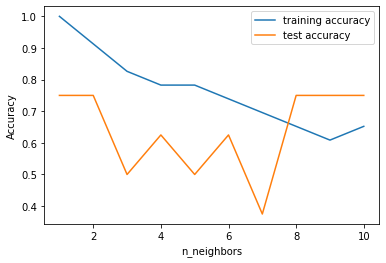

In [7]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(xtrain, ytrain)
    # record training set accuracy
    training_accuracy.append(knn.score(xtrain, ytrain))
    # record test set accuracy
    test_accuracy.append(knn.score(xtest, ytest))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [8]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(xtrain, ytrain)

print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(xtrain, ytrain)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(xtest, ytest)))

Accuracy of K-NN classifier on training set: 0.70
Accuracy of K-NN classifier on test set: 0.38


# Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(xtrain, ytrain)
print("Accuracy on training set: {:.3f}".format(tree.score(xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(tree.score(xtest, ytest)))

Accuracy on training set: 1.000
Accuracy on test set: 0.750


In [10]:
tree = DecisionTreeClassifier(max_depth=4, random_state=1)
tree.fit(xtrain, ytrain)

print("Accuracy on training set: {:.3f}".format(tree.score(xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(tree.score(xtest, ytest)))


Accuracy on training set: 1.000
Accuracy on test set: 0.625


# RandomForest Classifier

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(xtrain, ytrain)
print("Accuracy on training set: {:.3f}".format(rf.score(xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(rf.score(xtest, ytest)))

Accuracy on training set: 1.000
Accuracy on test set: 0.625


In [12]:
rf1 = RandomForestClassifier(max_depth=9, n_estimators=100, random_state=1)
rf1.fit(xtrain, ytrain)
print("Accuracy on training set: {:.3f}".format(rf1.score(xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(rf1.score(xtest, ytest)))

Accuracy on training set: 1.000
Accuracy on test set: 0.625


# Gradient Boost

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=0)
gb.fit(xtrain, ytrain)

print("Accuracy on training set: {:.3f}".format(gb.score(xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(gb.score(xtest, ytest)))

Accuracy on training set: 1.000
Accuracy on test set: 0.750


In [14]:
gb1 = GradientBoostingClassifier(random_state=0, max_depth=2)
gb1.fit(xtrain, ytrain)

print("Accuracy on training set: {:.3f}".format(gb1.score(xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(gb1.score(xtest, ytest)))


Accuracy on training set: 1.000
Accuracy on test set: 0.750


# Support Vector Machine

In [15]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(xtrain, ytrain)

print("Accuracy on training set: {:.2f}".format(svc.score(xtrain, ytrain)))
print("Accuracy on test set: {:.2f}".format(svc.score(xtest, ytest)))

Accuracy on training set: 0.87
Accuracy on test set: 0.75


# Gaussian Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(xtrain, ytrain)

y_pred_nb = model.predict(xtest)
print(y_pred_nb)

[1 0 0 0 0 1 0 1]


In [17]:
score_nb = round(accuracy_score(y_pred_nb,ytest)*100,2)

print("The accuracy score using Naive Bayes is: "+str(score_nb)+" %")


The accuracy score using Naive Bayes is: 62.5 %


<AxesSubplot:>

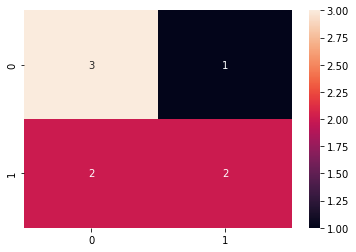

In [18]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(ytest, y_pred_nb)

sns.heatmap(matrix,annot = True, fmt = "d")

# Neural Networks

In [19]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42)
mlp.fit(xtrain, ytrain)

print("Accuracy on training set: {:.2f}".format(mlp.score(xtrain, ytrain)))
print("Accuracy on test set: {:.2f}".format(mlp.score(xtest, ytest)))

Accuracy on training set: 0.52
Accuracy on test set: 0.50


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(xtrain)
X_test_scaled = scaler.fit_transform(xtest)

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, ytrain)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, ytrain)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, ytest)))

Accuracy on training set: 1.000
Accuracy on test set: 0.500


In [21]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, ytrain)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, ytrain)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, ytest)))

Accuracy on training set: 1.000
Accuracy on test set: 0.625
